In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

import pathlib
import os
import itertools
import pandas as pd
import seaborn as sns
import networkx as nx
from networkx.algorithms import community
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import dendrogram, fcluster, cophenet
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import ExtraTreesClassifier
######
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
######
import uuid

from tqdm.notebook import tqdm, trange
import time    # to be used in loop iterations

%load_ext autoreload
%autoreload 2
import pysrc.utility as myutil

In [10]:
swd = pathlib.Path("/mnt/28627BDD627BAE66/diana-boldini/analysis")
tmp = pathlib.Path("./tmp-scp")
if not os.path.exists(tmp):
    os.makedirs(tmp)
host = "160.78.64.155"
user = "adiana"

#!ssh "{user}@{host}" "cd {swd} && (find . -type f | cut -d/ -f2 | sort | uniq -c | grep 'features-script-fake-root' | grep -v 'csv')"

In [11]:
ll = !ssh "{user}@{host}" "cd {swd} && (find . -type f | cut -d/ -f2 | sort | uniq -c  | grep -e '[0-9a-zA-Z]*features-script$')"
lista = []
for i, l in enumerate(ll):
    if l.lstrip().startswith('560'):
        lista.append(l)

for i, l in enumerate(lista):
    lista[i] = l[8:]
    
    
config = {'lp': 3,
  'const': 'False',
  'var': 'False',
  'sty': 'False',
 'cut': 'False',
  'mapID': 4}
conf_str = "-".join(f"{k}:{v}" for k,v in config.items())
for i in lista:
    !scp "{user}@{host}:{swd}/{i}/*{conf_str}*.csv" "{tmp}/{i}-{conf_str}.csv"
    match = !ls {tmp} | grep "{i}-{conf_str}.csv"
    #csv_file = list(match)
    #assert(len(csv_file) == 1)
    #csv_file = csv_file[0]

task = []
for i, l in enumerate(lista):
    task.append(l.split("-")[0][1:])

    
# Generazioni variabili per la configurazione
lp_l = range(3,10) # [3] ## OCCHIO!!!!!!!
const_l = ["True","False"]
var_l = ["True","False"]
sty_l = ["True","False"]
cut_l = ["True","False"]
mapID_l = range(5)
#task_l = range(1,9)

conf_keys = ["lp", "const", "var", "sty", "cut", "mapID"]

20230217-182511-lp:3-const:False-var:False-st 100%   23KB 118.8KB/s   00:00    
20230217-180540-lp:3-const:False-var:False-st 100%   18KB 116.1KB/s   00:00    
20230217-233723-lp:3-const:False-var:False-st 100%   21KB 126.6KB/s   00:00    
20230217-192411-lp:3-const:False-var:False-st 100%   30KB 217.3KB/s   00:00    
20230218-045517-lp:3-const:False-var:False-st 100%   30KB 256.7KB/s   00:00    
20230218-080410-lp:3-const:False-var:False-st 100%   40KB 203.7KB/s   00:00    
20230218-171631-lp:3-const:False-var:False-st 100%   25KB 178.1KB/s   00:00    
20230219-010219-lp:3-const:False-var:False-st 100%   15KB 109.7KB/s   00:00    
20230219-112157-lp:3-const:False-var:False-st 100%   26KB 183.9KB/s   00:00    
20230219-091734-lp:3-const:False-var:False-st 100%   18KB 144.2KB/s   00:00    
20230219-115621-lp:3-const:False-var:False-st 100%   29KB 203.8KB/s   00:00    
20230219-163257-lp:3-const:False-var:False-st 100%   27KB 197.0KB/s   00:00    
20230220-051504-lp:3-const:False-var:Fal

In [12]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    #"Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    #"AdaBoost",
    "Naive Bayes",
    #"QDA",
]
# svm non lineare, cambiare kernel

classifiers = [
    KNeighborsClassifier(len(task)),
    SVC(C=0.025),
    SVC(C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=1000),
    RandomForestClassifier(n_estimators=1000),
    MLPClassifier(alpha=0.5, max_iter=1000),
    #AdaBoostClassifier(n_estimators=1000),
    GaussianNB(),
    #QuadraticDiscriminantAnalysis(),
]

  0%|          | 0/560 [00:00<?, ?it/s]

20230217-172646-lp:3-const:True-var:True-sty: 100%   44KB 137.2KB/s   00:00    
20230217-172621-lp:3-const:True-var:True-sty: 100%   93KB 341.2KB/s   00:00    
20230217-224843-lp:3-const:True-var:True-sty: 100%   65KB 332.8KB/s   00:00    
20230217-171311-lp:3-const:True-var:True-sty: 100%  106KB 405.8KB/s   00:00    
20230218-004349-lp:3-const:True-var:True-sty: 100%   92KB 389.1KB/s   00:00    
20230218-054230-lp:3-const:True-var:True-sty: 100%  159KB 429.7KB/s   00:00    
20230218-102849-lp:3-const:True-var:True-sty: 100%   66KB 302.7KB/s   00:00    
20230219-001852-lp:3-const:True-var:True-sty: 100%   53KB 262.7KB/s   00:00    
20230219-061547-lp:3-const:True-var:True-sty: 100%   74KB 391.7KB/s   00:00    
20230219-084008-lp:3-const:True-var:True-sty: 100%   63KB 295.8KB/s   00:00    
20230219-094955-lp:3-const:True-var:True-sty: 100%   85KB 427.1KB/s   00:00    
20230219-141634-lp:3-const:True-var:True-sty: 100%   87KB 353.3KB/s   00:00    
20230220-020442-lp:3-const:True-var:True

Exception ignored in: <function _releaseLock at 0x7ffa491ec8b0>
Traceback (most recent call last):
  File "/home/alessio/anaconda3/envs/tesi/lib/python3.10/logging/__init__.py", line 228, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 


IOStream.flush timed out
20230219-001926-lp:3-const:True-var:True-sty: 100%   33KB  42.2KB/s   00:00    
20230219-061934-lp:3-const:True-var:True-sty: 100%   45KB 264.8KB/s   00:00    
20230219-084036-lp:3-const:True-var:True-sty: 100%   38KB 263.1KB/s   00:00    
20230219-095131-lp:3-const:True-var:True-sty: 100%   50KB 279.7KB/s   00:00    
20230219-141819-lp:3-const:True-var:True-sty: 100%   48KB 239.1KB/s   00:00    
20230220-020706-lp:3-const:True-var:True-sty: 100%   71KB 353.4KB/s   00:00    
20230220-085017-lp:3-const:True-var:True-sty: 100%   59KB 316.3KB/s   00:00    
20230220-170933-lp:3-const:True-var:True-sty: 100%   63KB 272.3KB/s   00:00    
20230221-005357-lp:3-const:True-var:True-sty: 100%   27KB 199.6KB/s   00:00    
20230221-025217-lp:3-const:True-var:True-sty: 100%   66KB 235.5KB/s   00:00    
20230221-100438-lp:3-const:True-var:True-sty: 100%   65KB 312.2KB/s   00:00    
20230221-173237-lp:3-const:True-var:True-sty: 100%   52KB 246.4KB/s   00:00    
20230221-194021

FileNotFoundError: [Errno 2] No such file or directory: 'tmp-scp/p00012-features-script-lp:3-const:True-var:True-sty:True-cut:True-mapID:1.csv'

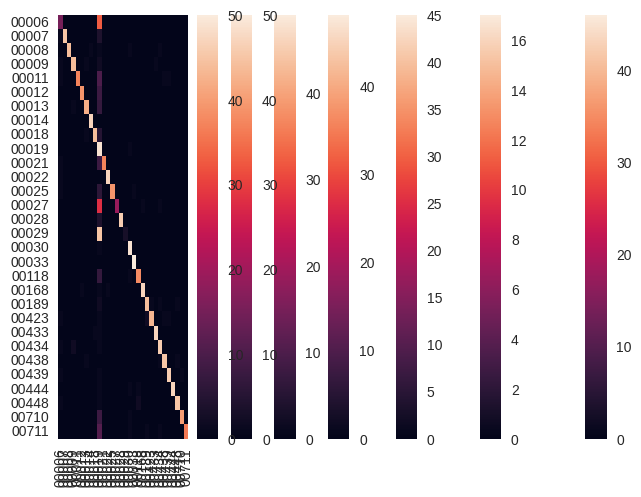

In [19]:
from tqdm.notebook import trange, tqdm
from datetime import datetime  

#config creation
conf_list = []
for idx, m in enumerate(itertools.product(lp_l, const_l, var_l, sty_l, cut_l, mapID_l)):
    conf_keys = ["lp", "const", "var", "sty", "cut", "mapID"]
    conf = dict(zip(conf_keys, [m[i] for i in range(len(conf_keys))]))
    conf_list.append(conf)

# Dataframe result creation
df_result = pd.DataFrame()
list_of_lines = []    
exec_time = {}
folding_number = 5

timestamp = datetime.now().timestamp()
timestamp_str = datetime.fromtimestamp(timestamp).strftime("%d-%m-%Y_%H:%M:%S")

with tqdm(total=len(conf_list)) as pbar:
    for idx, config in enumerate(conf_list):
        dfs = {}
        conf_str = "-".join(f"{k}:{v}" for k,v in config.items())

        #Timing
        download_time_start = time.time()    

        ll = !ssh "{user}@{host}" "cd {swd} && (find . -type f | cut -d/ -f2 | sort | uniq -c  | grep -e '[0-9a-zA-Z]*features-script$')"
        lista = []
        for i, l in enumerate(ll):
            if l.lstrip().startswith('560'):
                lista.append(l)

        for i, l in enumerate(lista):
            lista[i] = l[8:]

        for i in lista:
            !scp "{user}@{host}:{swd}/{i}/*{conf_str}*.csv" "{tmp}/{i}-{conf_str}.csv"
            match = !ls {tmp} | grep "{i}-{conf_str}.csv"
            #csv_file = list(match)
            #assert(len(csv_file) == 1)
            #csv_file = csv_file[0]

        task = []
        for i, l in enumerate(lista):
            task.append(l.split("-")[0][1:])


        # Aggiunta colonna 'task' e 'id'
        for l in lista:
            name = l + "-" + conf_str + ".csv"
            l = l.split("-")[0][1:]
            dfs[l] = pd.read_csv(tmp/name, sep=",")
            dfs[l]["task"] = int(l.split("-")[0][1:])
            dfs[l]["id"] = dfs[l]["id"] + "-" + l.split("-")[0][1:]

        #Timing
        download_time_end = time.time()
        exec_time['download'] = download_time_end - download_time_start
        clean_time_start = time.time()

        # Clean.
        for l in task:
            #print(f"Problem: {l}")
            dfs[l] = myutil.remove_zero_rows(dfs[l], exclude_col=["task"])
            dfs[l] = myutil.clean_and_index(dfs[l])

            #print("    Original: " + str(dfs[l].shape))
            # Feature selection (FEATURE CORRELATION) UNFINET FEATURE SELECTION
            #th = dfs[l].var().mean()
            th = (dfs[l].var()/dfs[l].mean()).mean()/2# remove everything below the average value of variance/mean
            sel = VarianceThreshold(threshold=th)
            df_min = sel.fit_transform(dfs[l])
            # redo the dataframe
            feats = sel.get_feature_names_out()
            index = dfs[l].index
            dfs[l] = pd.DataFrame(df_min)
            dfs[l] = dfs[l].set_index(index)
            dfs[l].columns = feats
            #print("    After feature selection: " + str(dfs[l].shape))

            dfs[l]["task"] = l

           # Outlier Elimination (TENERE TUTTO E PROVARE A VEDERE CHE COSA SUCCEDE)
            #contamination_level = 0.01 # percentage of contamination
            #num_estimators = 300
            #iForest = IsolationForest(random_state=0, contamination=contamination_level, n_estimators=num_estimators).fit_predict(dfs[l])
            #mask = [i for i, f in enumerate(iForest) if f<0]
            #to_drop = dfs[l].iloc[mask].index
            #print(to_drop)
            #dfs[l] = dfs[l].drop(to_drop)
            #print("     After outlier elimination: " + str(dfs[l].shape))

        # Concat all df(s).
        df_tot = pd.concat([dfs[l.split("-")[0][1:]] for l in lista], ignore_index=False, sort=False)
        df_tot = df_tot.fillna(0)
        assert(df_tot.shape[0] == sum([dfs[l.split("-")[0][1:]].shape[0] for l in lista]))

        df_tot = myutil.drop_unuseful_features_all_equal(df_tot)

        print("Final shape:" + str(df_tot.shape))

        # Dataset creation
        #datasets = []
######
        X = df_tot.drop('task', axis=1).values
        #assert('task' not in X.columns and 'id' not in X.columns)
        y = df_tot['task'].values
######
        #datasets.append([X, y])

        #Timing
        clean_time_end = time.time()
        exec_time['cleaning'] = clean_time_end - clean_time_start
        
        
        # TO BE MODIFIED, MORE PRECISE
        # Confusion matrix e metriche
######
        for i, clf in enumerate(classifiers):
            classifier_time_start = time.time()
            
            clf = make_pipeline(StandardScaler(), clf)
            
            actual_classes = np.empty([0], dtype=int)
            predicted_classes = np.empty([0], dtype=int)
            kfold = KFold(n_splits=5, random_state=42, shuffle=True)
            
            for train_ndx, test_ndx in kfold.split(X):
                train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]
                
                clf.fit(train_X, train_y)
                
                actual_classes = np.append(actual_classes, test_y)
                predicted_classes = np.append(predicted_classes, clf.predict(test_X))
                
                #score = cross_val_predict(clf, X, y, cv=folding_number, n_jobs=-1)

            #score = clf.score(X_test, y_test)
            #print(names[i] + ": " + str(score.mean()) + " " + str(score.std()))
            
            matrix = confusion_matrix(actual_classes, predicted_classes, labels=task)
            #print(matrix)
            #sns.heatmap(matrix, xticklabels=task, yticklabels=task)
            
            
            classifier_time_end = time.time()
            exec_time[f"compute_{names[i]}"] = classifier_time_end - classifier_time_start

            line = (config | {'class_number': len(lista), 'classifier': names[i], 'matrix_raw': matrix} 
                    | {'time_clean': exec_time['cleaning'], 'time_down': exec_time['download'], 'time_classifier': exec_time[f"compute_{names[i]}"]})
            #line = (config | {'class_number': len(lista), 'classifier': names[i], 'score_mean': score.mean(), 'score_std': score.std(), 'score_raw': score} 
            #        | {'time_clean': exec_time['cleaning'], 'time_down': exec_time['download'], 'time_classifier': exec_time[f"compute_{names[i]}"]})
            
            list_of_lines.append(line)
######
        print(exec_time['cleaning'])
        print([exec_time[k] for k in ["compute_"+c for c in names]])
        print(exec_time['download'])
        print("Tot time one iteration: " + str(exec_time['cleaning']+sum([exec_time[k] for k in ["compute_"+c for c in names]])+exec_time['download']))
        #for i, clf in enumerate(classifiees):
        #    line = config | dict(zip(names, scores))
        #    #print(line)
        #    list_of_lines.append(line)

        # Save intermidiate results
        if (idx+1) % 10 == 0:
            df_result_tmp = pd.DataFrame(list_of_lines)
            df_result_tmp.to_csv(f"df_harvesting_{timestamp_str}tmp.csv")

        # Remove all downloaded files
        !rm {tmp}/*.csv

        pbar.update()
        
df_result=pd.DataFrame(list_of_lines)
df_result.to_csv(f"df_harvesting_{timestamp_str}.csv")
